In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandahouse as ph
from scipy import stats
import os
#импортируем необходимые модули

In [2]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': os.environ['KC_PASSWORD'],
    'user': 'student',
    'database': 'simulator_20221120'
}

q = '''
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2022-10-26' and '2022-11-01'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
'''

df = ph.read_clickhouse(q, connection=connection) #подключаемся к базе данных и копируем необходимые данные в DataFrame

In [10]:
np.random.seed(1) #задаем случайное зерно для повторения результатов

In [14]:
p_values=[] #инициализируем пустой список для записи p-значений
for i in range(10000):
    group_2 = df[df.exp_group == 2].sample(500)
    group_3 = df[df.exp_group == 3].sample(500)
    p_values.append(stats.ttest_ind(group_2.ctr, group_3.ctr, equal_var=False)[1]) #повторяем t-тест 10000 раз и записываем получившиеся p-значения

<AxesSubplot: ylabel='Count'>

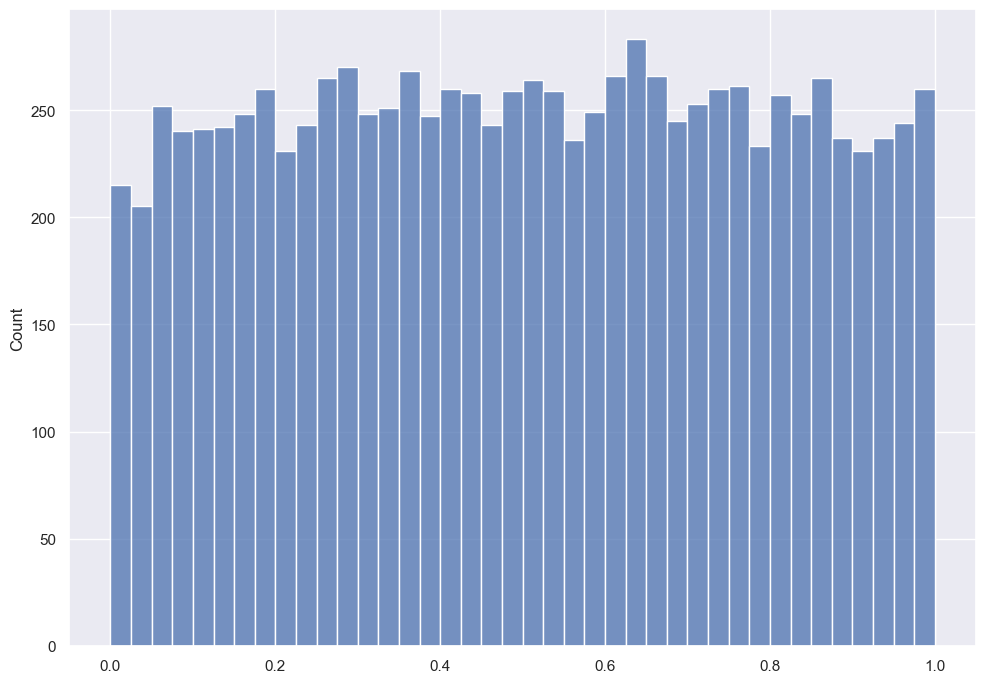

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #делаем графики покрупнее
sns.histplot(data=p_values, bins=40) #строим гистограмму

In [16]:
p_values_array = np.array(p_values) #записываем список в numpy массив для упрощения работы с ним
percent = len(p_values_array[p_values_array <= 0.05]) / len(p_values_array) #считаем процент "покраски" теста
print('В {:.2%} случаев получились статистически значимые различия между группами'.format(percent))

В 4.20% случаев получились статистически значимые различия между группами


## Вывод
Процент тестов, в которых мы отклонили нулевую гипотезу приблизительно равен выбранному $\alpha$, а значит тест "красился" только в результате случайного ложного срабатывания. Следовательно, наша система сплитования работает корректно